## Association subtypes language (Story Vs Math)

In [1]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
sns.set(color_codes=True)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %matplotlib inline
    ^


In [18]:
path_root = "/home/yassinebha/Drive/HCP"
data_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_23-May-2017/associations/")

ERROR: Error in os.path.join(path_root, "subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_23-May-2017/associations/"): could not find function "os.path.join"


In [16]:
# Load pheno-subtype file
# Story
data = pd.read_csv(os.path.join(data_path,'story_pheno_subtype.csv'))
data_clean = data.dropna() # remove nan's
data_clean.head()

ERROR: Error in pd.read_csv(os.path.join(data_path, "fear_pheno_subtype.csv")): could not find function "pd.read_csv"


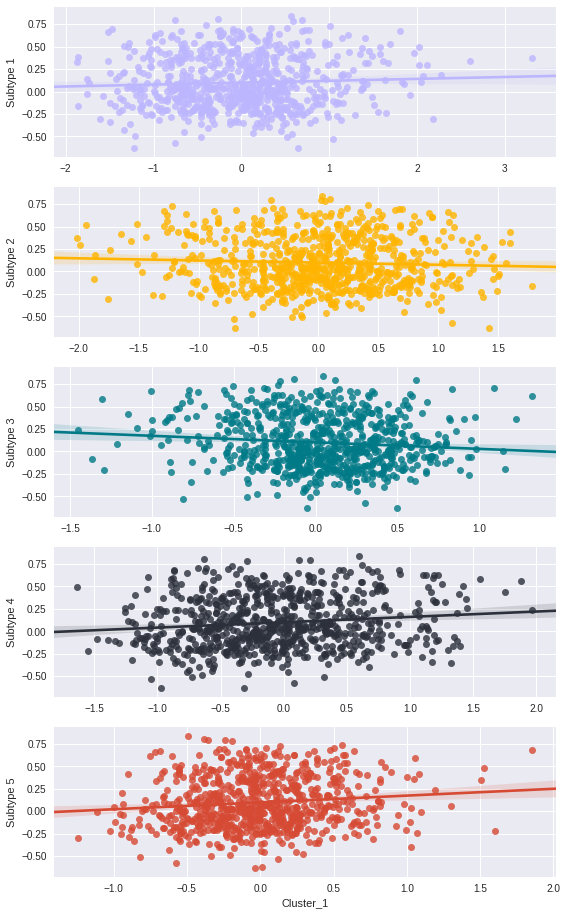

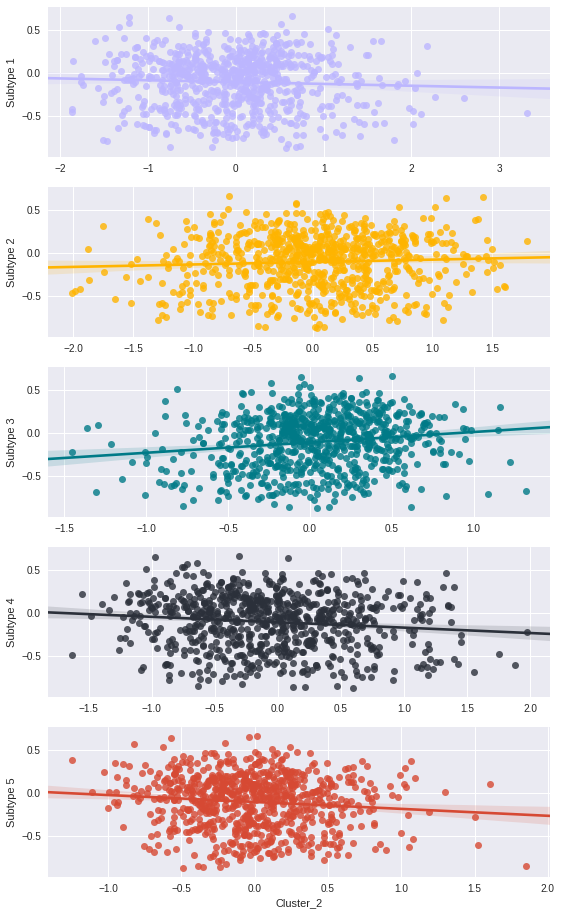

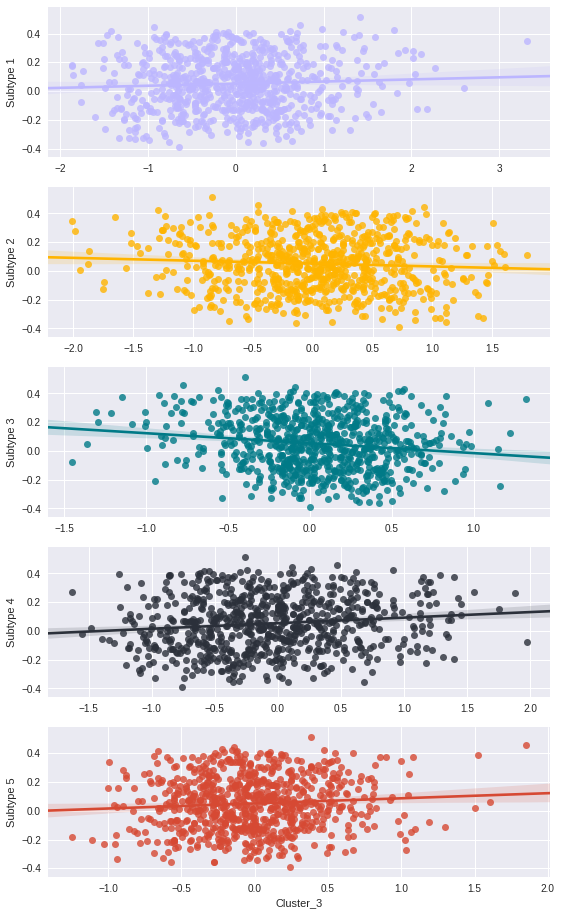

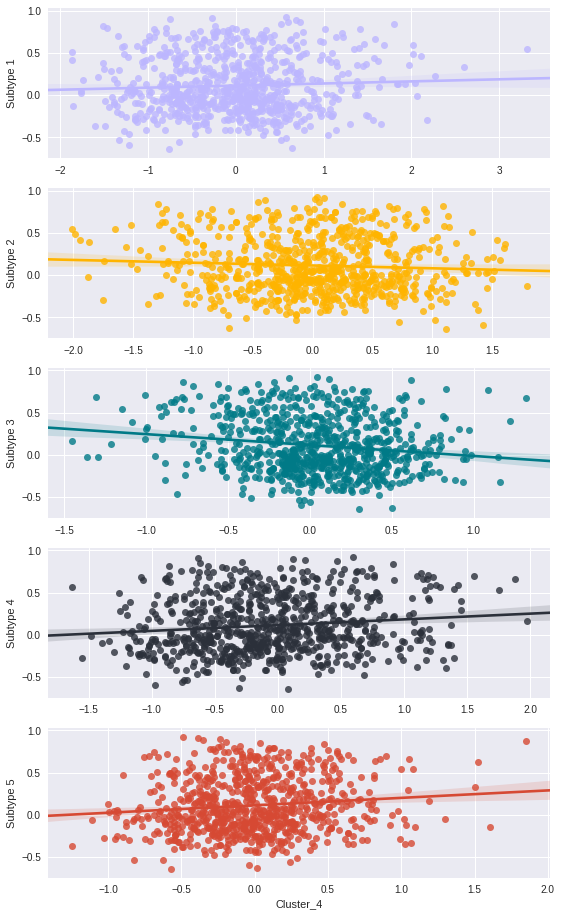

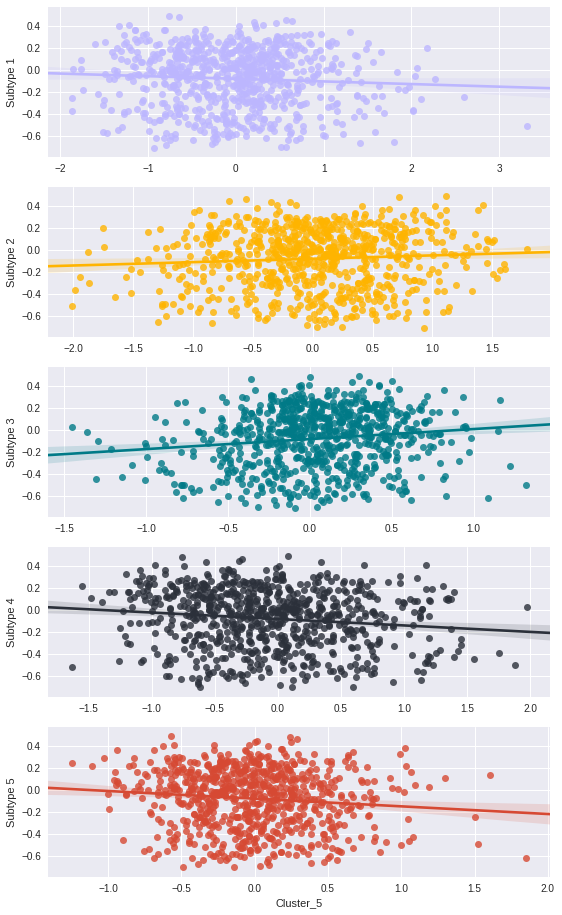

In [5]:
trial_list  = ['story']
subt_list = ['sub1','sub2','sub3','sub4','sub5']
numb_cluter = 5
for trial in trial_list :
    data = pd.read_csv(os.path.join(data_path,'{}_pheno_subtype.csv'.format(trial)))
    data_clean = data.dropna() # remove nan's
    for idx, subt in enumerate(subt_list):

        fig = plt.figure(figsize=(9,16))
        ax1 = fig.add_subplot(511)
        ax1 = sns.regplot(x="cluster_1", y=subt, data=data_clean,color="#BCB6FF");
        ax1.set_ylabel('Subtype 1')
        ax1.set_xlabel('')

        ax2 = fig.add_subplot(512)
        ax2= sns.regplot(x="cluster_2", y=subt, data=data_clean,color="#ffb400");
        ax2.set_ylabel('Subtype 2')
        ax2.set_xlabel('')

        ax3 = fig.add_subplot(513)
        ax3= sns.regplot(x="cluster_3", y=subt, data=data_clean,color="#007a87");
        ax3.set_ylabel('Subtype 3')
        ax3.set_xlabel('')
        
        ax4 = fig.add_subplot(514)
        ax4= sns.regplot(x="cluster_4", y=subt, data=data_clean,color="#2B303A");
        ax4.set_ylabel('Subtype 4')
        ax4.set_xlabel('')
        
        ax5 = fig.add_subplot(515)
        ax5= sns.regplot(x="cluster_5", y=subt, data=data_clean,color="#D64933");
        ax5.set_ylabel('Subtype 5')
        ax5.set_xlabel('Cluster_{}'.format(idx+1))

        fig.savefig(os.path.join(data_path,"{}_pheno_association_{}.svg".format(trial,subt)))

In [ ]:
########################### Change kernel to R #############################

In [1]:
# first on terminal install cairo : "sudo apt install libcairo2-dev" then "sudo apt-get install r-cran-stringr"
#devtools::install_github("hadley/svglite")
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)

In [1]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

Loading required package: ggplot2


In [3]:
path_root = "/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_23-May-2017/"
list_trial <- list.dirs(paste(path_root,"networks/",sep = ''), full.names = FALSE,recursive=FALSE)
print(list_trial)

[1] "story"


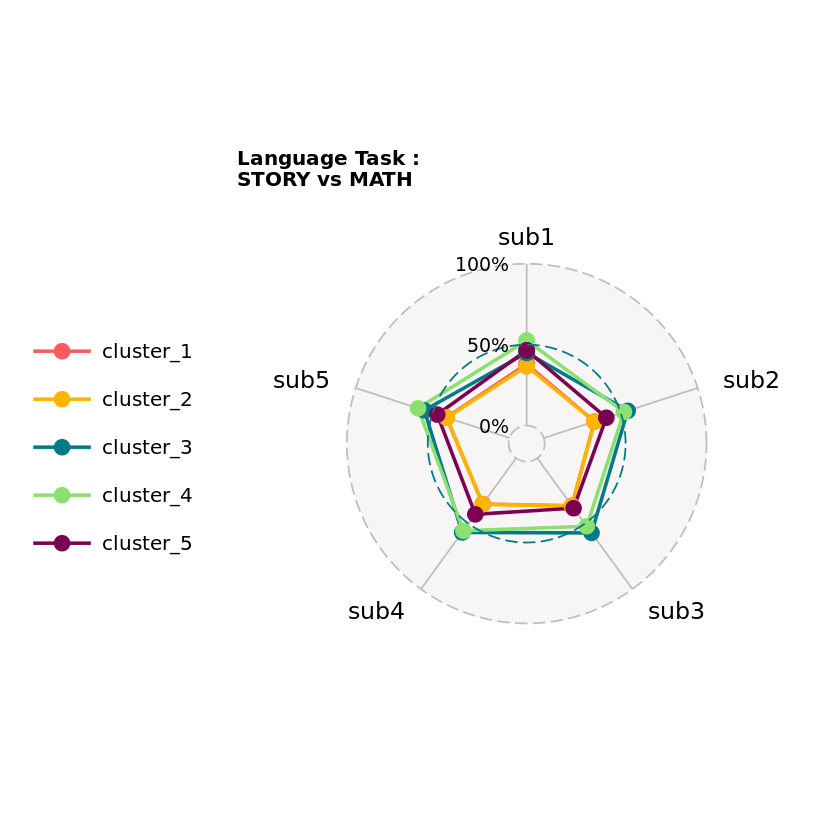

In [15]:
for (ii in list_trial) {
    MyData <- read.csv(file=paste(path_root,"associations/",ii,"_r2.csv",sep = ''))
    # plot R2 radar plot
    image_radar=ggradar(MyData, 
                        grid.min = 0,
                        grid.mid = 0.05, 
                        grid.max = 0.1, 
                        axis.label.size = 5, 
                        grid.label.size = 5 ,
                        legend.text.size =5,
                        group.line.width = 1,
                        group.point.size = 4)  +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' Language Task : \n ',toupper(ii),' vs MATH',sep = ''))
    print(image_radar)
    ggsave(file=paste(path_root,"associations/",ii,"_R-squared.svg",sep = ''), plot=image_radar, width=10, height=8)
}